In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv("CPU_benchmark_v4.csv")
df.head()

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,NaN,108822,NaN,3330,NaN,280.0,388.65,64,2022,sWRX8,Desktop
1,AMD EPYC 7763,7299.99,88338,12.10,2635,0.36,280.0,315.49,64,2021,SP3,Server
2,AMD EPYC 7J13,NaN,86006,NaN,2387,NaN,NaN,NaN,64,2021,unknown,Server
3,AMD EPYC 7713,7060.00,85861,12.16,2727,0.39,225.0,381.6,64,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,6807.98,83971,12.33,2626,0.39,280.0,299.9,64,2020,sWRX8,Desktop


In [6]:
df.isnull().sum()

cpuName        0
price          0
cpuMark        0
cpuValue       0
threadMark     0
threadValue    0
TDP            0
powerPerf      0
cores          0
testDate       0
socket         0
category       0
dtype: int64

In [5]:
df= df.fillna(0)
df

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,0.00,108822,0.00,3330,0.00,280.0,388.65,64,2022,sWRX8,Desktop
1,AMD EPYC 7763,7299.99,88338,12.10,2635,0.36,280.0,315.49,64,2021,SP3,Server
2,AMD EPYC 7J13,0.00,86006,0.00,2387,0.00,0.0,0,64,2021,unknown,Server
3,AMD EPYC 7713,7060.00,85861,12.16,2727,0.39,225.0,381.6,64,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,6807.98,83971,12.33,2626,0.39,280.0,299.9,64,2020,sWRX8,Desktop
...,...,...,...,...,...,...,...,...,...,...,...,...
3820,Intel Pentium 4 1.60GHz,0.00,84,0.00,225,0.00,38.0,2.22,1,2009,PGA478,Desktop
3821,Intel Pentium 4 1400MHz,0.00,83,0.00,180,0.00,54.7,1.52,1,2009,PGA423,Desktop
3822,Intel Pentium 4 1500MHz,0.00,81,0.00,223,0.00,57.8,1.41,1,2009,PGA423,Desktop
3823,VIA Eden 1000MHz,0.00,80,0.00,83,0.00,5.0,16.08,1,2017,NanoBGA2,Laptop


In [7]:
df.describe()

,price,cpuMark,cpuValue,threadMark,threadValue,TDP,cores,testDate
count,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000,3825.000000
mean,227.041140,5992.305882,18.181205,1391.107451,7.810923,51.205033,5.052288,2015.027974
std,687.056184,9617.551479,31.171810,815.667528,14.916642,49.280020,6.185833,4.597616
min,0.000000,77.000000,0.000000,75.000000,0.000000,0.000000,1.000000,2007.000000
25%,0.000000,943.000000,0.000000,729.000000,0.000000,15.000000,2.000000,2011.000000
50%,15.000000,2331.000000,2.860000,1274.000000,0.700000,35.000000,4.000000,2015.000000
75%,169.000000,6643.000000,26.260000,1961.000000,10.040000,77.000000,6.000000,2020.000000
max,8978.000000,108822.000000,345.330000,4317.000000,267.820000,300.000000,80.000000,2022.000000


Text(0.5, 1.0, 'figure #1 - heatmap of pearson correlation coefficient of numerical variables')

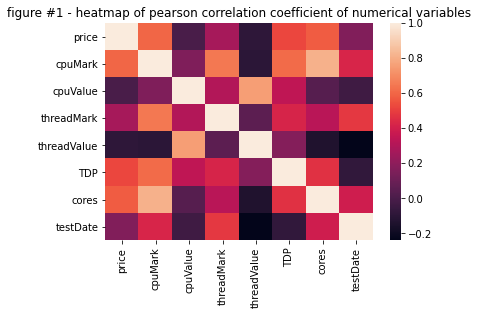

In [19]:
datacorr = df.corr(method ="pearson")
sns.heatmap(datacorr)
plt.title("figure #1 - heatmap of pearson correlation coefficient of numerical variables")

In [9]:
datacorr.round(3)

,price,cpuMark,cpuValue,threadMark,threadValue,TDP,cores,testDate
price,1.000,0.600,0.001,0.273,-0.089,0.524,0.575,0.163
cpuMark,0.600,1.000,0.162,0.651,-0.096,0.616,0.815,0.428
cpuValue,0.001,0.162,1.000,0.304,0.755,0.345,0.039,-0.034
threadMark,0.273,0.651,0.304,1.000,0.059,0.419,0.324,0.485
threadValue,-0.089,-0.096,0.755,0.059,1.000,0.173,-0.136,-0.240
TDP,0.524,0.616,0.345,0.419,0.173,1.000,0.464,-0.078
cores,0.575,0.815,0.039,0.324,-0.136,0.464,1.000,0.394
testDate,0.163,0.428,-0.034,0.485,-0.240,-0.078,0.394,1.000


In [30]:
df['cores'].corr(df['cpuMark'])

0.8147167678318189

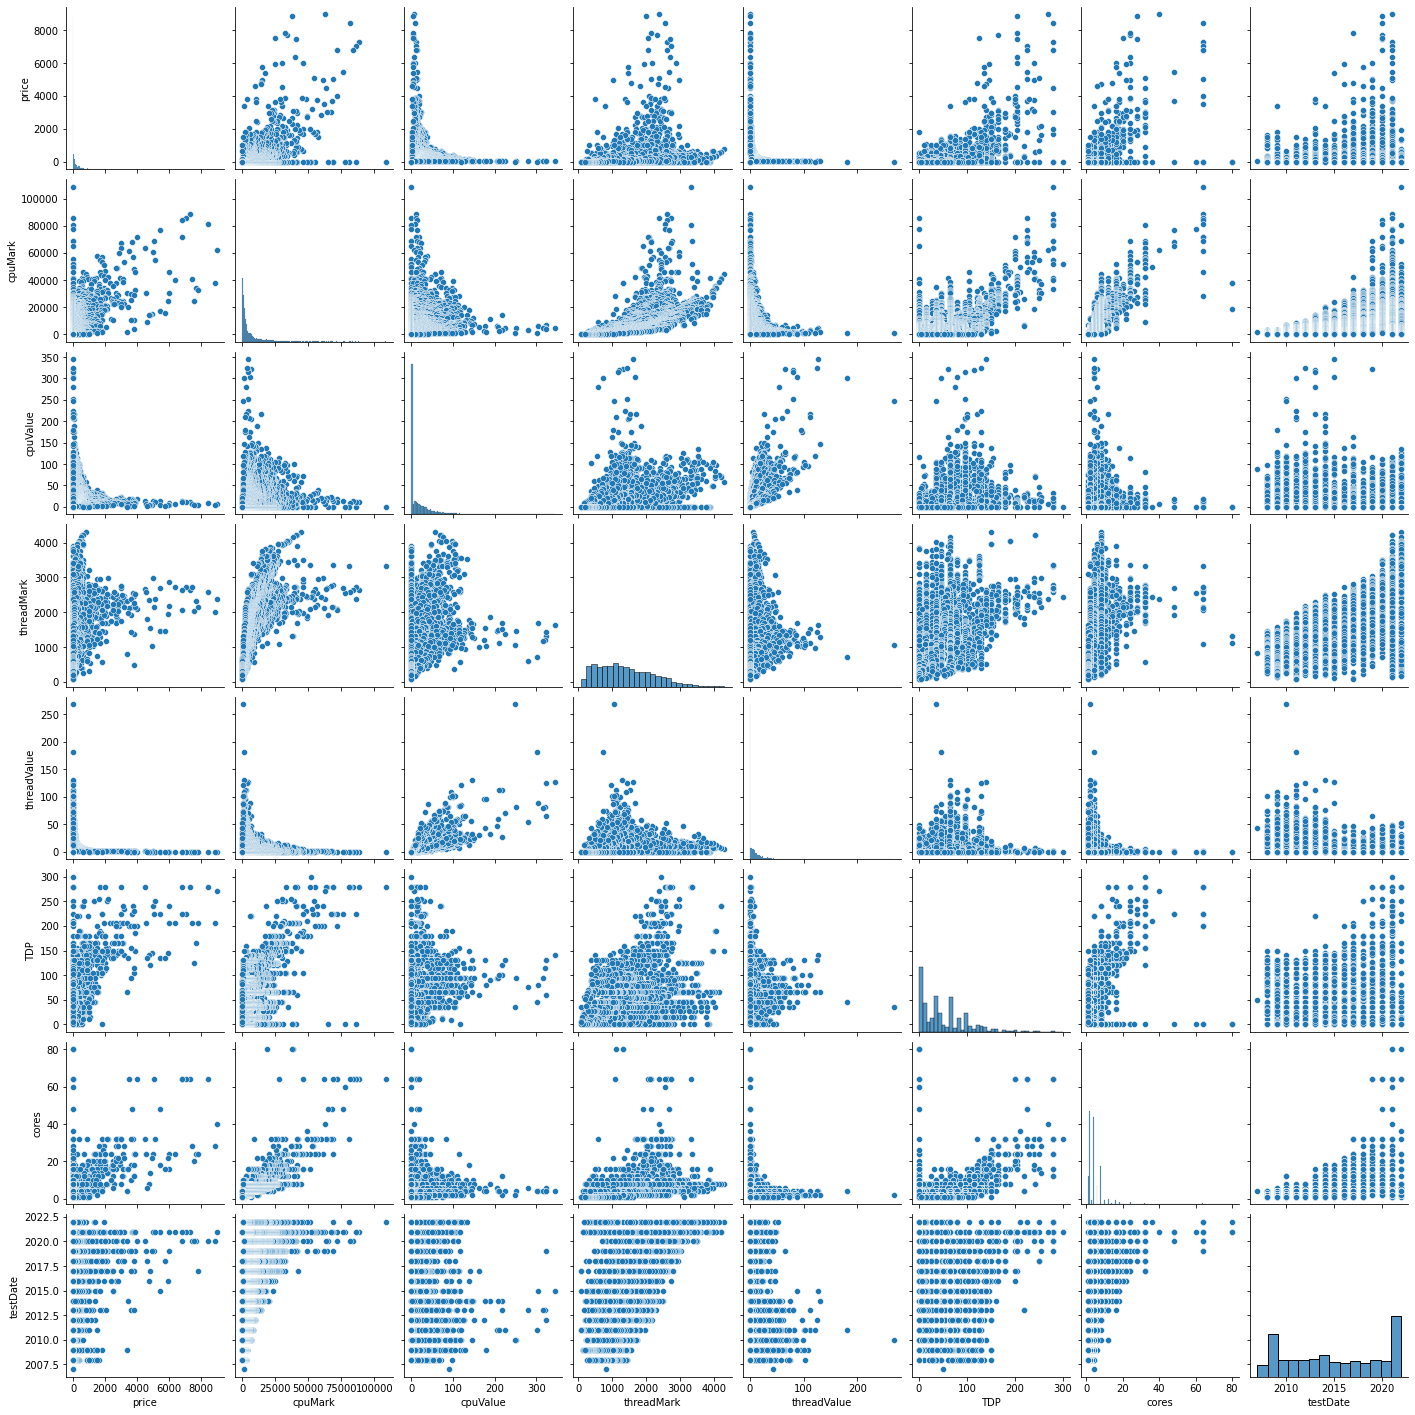

In [22]:
sns.pairplot(df)

In [24]:
non_import_cols = []

for col in df.columns:
    column = df[col]
    count = len(column[column == 0])
    if count > 100:
        non_import_cols.append(col)

sub_df = df.drop(non_import_cols, axis=1)

sub_df.index = range(len(sub_df.index))
un_cols = []
for col in sub_df.columns:
    if col[0:7] == "Unnamed":
        un_cols.append(col)

print(non_import_cols)
sub_df.index = range(len(sub_df.index))
sub_df = sub_df.drop(un_cols, axis=1)
sub_df.info

sub_df

['price', 'cpuValue', 'threadValue', 'TDP', 'powerPerf']


,cpuName,cpuMark,threadMark,cores,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,108822,3330,64,2022,sWRX8,Desktop
1,AMD EPYC 7763,88338,2635,64,2021,SP3,Server
2,AMD EPYC 7J13,86006,2387,64,2021,unknown,Server
3,AMD EPYC 7713,85861,2727,64,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,83971,2626,64,2020,sWRX8,Desktop
...,...,...,...,...,...,...,...
3820,Intel Pentium 4 1.60GHz,84,225,1,2009,PGA478,Desktop
3821,Intel Pentium 4 1400MHz,83,180,1,2009,PGA423,Desktop
3822,Intel Pentium 4 1500MHz,81,223,1,2009,PGA423,Desktop
3823,VIA Eden 1000MHz,80,83,1,2017,NanoBGA2,Laptop


(1147, 1)
(2678, 1)
(1147, 1)
(2678, 1)
Linear fit score:  0.6648080527086013


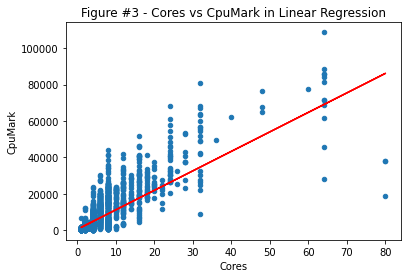

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df['cores'].values.reshape(-1,1)
Y = df['cpuMark'].values.reshape(-1,1)

#Train into 50/50 test and train split - set random_state to 1 to fix permutations can be any int
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.7, random_state=1)

#data shapes - check split data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

#create linear regression model
linear_model = LinearRegression()

#fit model
linear_model.fit(X_train, Y_train)

#y predict
y_pred_linear = linear_model.predict(X_test)

#plot model on data
plt.scatter(X, Y, s=20)
plt.plot(X_test, y_pred_linear, color="red")
plt.xlabel("Cores")
plt.ylabel("CpuMark")
plt.title("Figure #3 - Cores vs CpuMark in Linear Regression")
print("Linear fit score: ", r2_score(Y_test, y_pred_linear))

In [38]:
#Polynomial Regression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error 

#get degree of polynomial
poly = PolynomialFeatures(degree=3)

#transform our poly feature metrics 
X_poly = poly.fit_transform(X_train)

#create poly model
poly_model = LinearRegression()

#fit poly model
poly_model.fit(X_poly, Y_train)

# predicting on training data
y_train_predict = poly_model.predict(X_poly)

#predicting on testing data
y_test_predict = poly_model.predict(poly.fit_transform(X_test))

#sort x values on xtraining set
x_sorted = np.sort(X_train, axis=0)

#predict new x sorted vals for y pred
y_pred_sorted = poly_model.predict(poly.fit_transform(x_sorted))
  
#coefficients of our equation and intercept
poly_coefficients = poly_model.coef_
poly_intercept = poly_model.intercept_

print('Polynomial regression coefficients: {}'.format(poly_coefficients))
print('Polynomial regression intercept: {}'.format(poly_intercept))

Polynomial regression coefficients: [[ 0.00000000e+00  1.28455256e+03  1.64470700e+01 -3.43147890e-01]]
Polynomial regression intercept: [-1018.67347737]


28170844.80869163


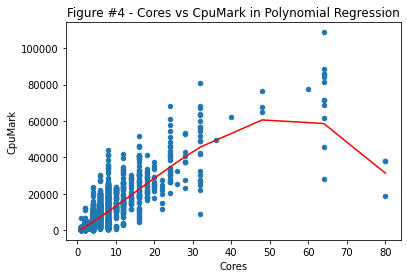

In [39]:

plt.plot(x_sorted, y_pred_sorted,color="red")
plt.scatter(X, Y, s=20)
plt.xlabel("Cores")
plt.ylabel("CpuMark")
plt.title("Figure #4 - Cores vs CpuMark in Polynomial Regression")

MSE_test = mean_squared_error(Y_test, y_test_predict)
print(MSE_test)

In [28]:
test_MSE = []
poly_list = [1,2,3,4,5,6,7,8,9,10]
training_MSE = []
for i in poly_list:

    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(X_train)              
    #create poly model
    poly_model = LinearRegression()
    #fit poly model
    poly_model.fit(x_poly, Y_train)
    #predicting on testing data
    y_train_predict = poly_model.predict(x_poly)
    y_test_predict = poly_model.predict(poly.fit_transform(X_test))
    #sort x values on xtraining set
    x_sorted = np.sort(X_train, axis=0)
    #predict new x sorted vals for y pred
    y_pred_sorted = poly_model.predict(poly.fit_transform(x_sorted))
    MSE_train = mean_squared_error(Y_train, y_train_predict)
    MSE_test = mean_squared_error(Y_test, y_test_predict)
    # to collect the answer after each iteration/increase of degrees
    test_MSE.append(MSE_test)
    training_MSE.append(MSE_train)

print(test_MSE)
print(training_MSE)

[32714488.7294958, 30617717.16378259, 28170844.80869163, 27826531.376527384, 27797588.898000624, 27845458.249960195, 27920750.847877286, 28009335.647157904, 30202952.536753763, 195820596.26039326]
[32239122.03154068, 24497409.617101848, 23230660.386394735, 23143976.827085283, 23051851.662535705, 22993095.131209314, 22862887.734848447, 22838549.623632655, 23422162.409182735, 24210898.65986852]


Text(0, 0.5, 'MSE')

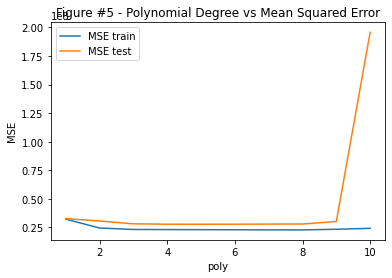

In [34]:
plt.plot(poly_list, training_MSE, label='MSE train')
plt.plot(poly_list, test_MSE, label='MSE test')
plt.title("Figure #5 - Polynomial Degree vs Mean Squared Error")
plt.legend()
plt.xlabel('poly')
plt.ylabel("MSE")


In [35]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
np.mean(cross_val_score(lr, X_train, Y_train, scoring='r2', cv=5))

0.5869100120190429

In [36]:

def create_poly_model(degree):
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(X_train)      
    poly_model = LinearRegression()
    return np.mean(cross_val_score(poly_model, x_poly, Y_train, scoring='neg_mean_squared_error', cv=5)*-1)

poly_cv = []
for i in range(1,11):
 poly_cv.append(create_poly_model(i))

print(poly_cv)

[33300350.448021732, 25378849.280959215, 24121075.93192637, 24329001.790406544, 24536155.048269134, 24753032.89301213, 29926754.24436165, 157021594.47209635, 2079211028.8435173, 9333404961.196362]


Text(0, 0.5, 'MSE')

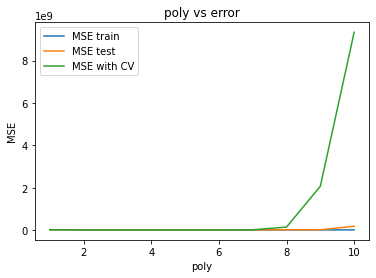

In [37]:
plt.plot(poly_list, training_MSE, label='MSE train')
plt.plot(poly_list, test_MSE, label='MSE test')
plt.plot(poly_list, poly_cv, label='MSE with CV')
plt.title("poly vs error")
plt.legend()
plt.xlabel('poly')
plt.ylabel("MSE")

In [182]:
Dekstop_df = pd.DataFrame(sub_df.loc[sub_df['category'] == 'Desktop'])
Server_df = pd.DataFrame(sub_df.loc[sub_df['category'] == 'Server'])
Laptop_df = pd.DataFrame(sub_df.loc[sub_df['category'] == 'Laptop'])
Unknown_df = pd.DataFrame(sub_df.loc[sub_df['category'] == 'Unknown'])
pdList = [Dekstop_df, Server_df, Laptop_df, Unknown_df ]
Comp_df = pd.concat(pdList)

Comp_df.index = range(len(Comp_df.index))


Comp_df

,cpuName,cpuMark,threadMark,cores,testDate,socket,category,Class_encoded
0,AMD Ryzen Threadripper PRO 5995WX,108822,3330,64,2022,sWRX8,Desktop,0
1,AMD Ryzen Threadripper PRO 3995WX,83971,2626,64,2020,sWRX8,Desktop,0
2,AMD Ryzen Threadripper 3990X,81568,2569,64,2020,sTRX4,Desktop,0
3,AMD Ryzen Threadripper PRO 5975WX,80842,3340,32,2022,sWRX8,Desktop,0
4,AMD Ryzen Threadripper PRO 5965WX,68405,3346,24,2022,sWRX8,Desktop,0
...,...,...,...,...,...,...,...,...
3327,VIA C7-M 1200MHz,112,93,1,2011,unknown,Unknown,11
3328,Intel Celeron 1.70GHz,101,190,1,2009,unknown,Unknown,11
3329,VIA Nehemiah,101,75,1,2011,unknown,Unknown,11
3330,VIA Esther 1000MHz,95,82,1,2011,unknown,Unknown,11


In [183]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
Comp_df['Class_encoded2']= le.fit_transform(Comp_df['category'])
Comp_df

,cpuName,cpuMark,threadMark,cores,testDate,socket,category,Class_encoded,Class_encoded2
0,AMD Ryzen Threadripper PRO 5995WX,108822,3330,64,2022,sWRX8,Desktop,0,0
1,AMD Ryzen Threadripper PRO 3995WX,83971,2626,64,2020,sWRX8,Desktop,0,0
2,AMD Ryzen Threadripper 3990X,81568,2569,64,2020,sTRX4,Desktop,0,0
3,AMD Ryzen Threadripper PRO 5975WX,80842,3340,32,2022,sWRX8,Desktop,0,0
4,AMD Ryzen Threadripper PRO 5965WX,68405,3346,24,2022,sWRX8,Desktop,0,0
...,...,...,...,...,...,...,...,...,...
3327,VIA C7-M 1200MHz,112,93,1,2011,unknown,Unknown,11,3
3328,Intel Celeron 1.70GHz,101,190,1,2009,unknown,Unknown,11,3
3329,VIA Nehemiah,101,75,1,2011,unknown,Unknown,11,3
3330,VIA Esther 1000MHz,95,82,1,2011,unknown,Unknown,11,3


In [184]:
pca_df = pd.DataFrame(Comp_df.iloc[:, 1:5])
pca_df

,cpuMark,threadMark,cores,testDate
0,108822,3330,64,2022
1,83971,2626,64,2020
2,81568,2569,64,2020
3,80842,3340,32,2022
4,68405,3346,24,2022
...,...,...,...,...
3327,112,93,1,2011
3328,101,190,1,2009
3329,101,75,1,2011
3330,95,82,1,2011


In [49]:
sub_df.loc[:,['category']].values

array([['Desktop'],
       ['Server'],
       ['Server'],
       ...,
       ['Desktop'],
       ['Laptop'],
       ['Desktop']], dtype=object)

In [185]:
feature_cols = pca_df.columns 
x = pca_df.loc[:,feature_cols].values
y = Comp_df.loc[:,['category']].values
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [187]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_x = pd.DataFrame(pca.fit_transform(x),columns=['PC1','PC2', 'PC3', 'PC4'])
pca_final = pd.concat([pca_x,Comp_df.category],axis=1)
pca_final.index = range(len(pca_final.index))
pca_final

,PC1,PC2,PC3,PC4,category
0,11.957598,6.859166,-0.902344,-1.594504,Desktop
1,9.940040,6.773034,-0.140610,-0.053071,Desktop
2,9.773173,6.735870,-0.042522,0.097793,Desktop
3,8.096232,2.850636,-1.109320,-2.353826,Desktop
4,6.832753,1.681407,-1.041044,-2.144635,Desktop
...,...,...,...,...,...
3327,-1.788554,0.625583,0.532910,-0.412103,Unknown
3328,-1.953793,0.791141,0.117583,-0.338535,Unknown
3329,-1.799989,0.636509,0.547022,-0.419087,Unknown
3330,-1.796109,0.631949,0.541766,-0.415620,Unknown


Text(0.5, 1.0, ' Figure #6 - PC1 vs PC2 of Classes of Computers')

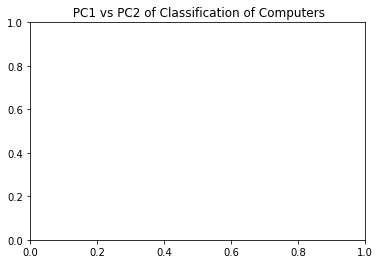

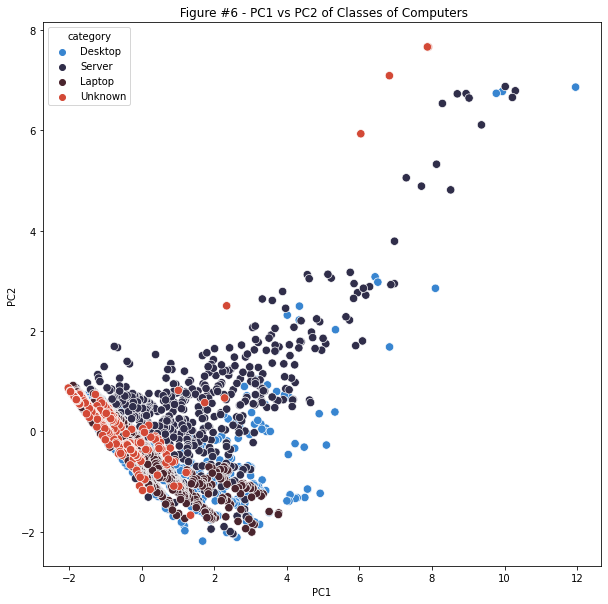

In [188]:
ax = plt.axes()
plt.figure(figsize=(10,10))
sns.scatterplot(data = pca_final , x = 'PC1',y = 'PC2', hue="category", s = 70, palette="icefire")
ax.set_title(" PC1 vs PC2 of Classification of Computers")
plt.title(" Figure #6 - PC1 vs PC2 of Classes of Computers")

Text(0.5, 1.0, 'Figure #7 Scree Graph of eigenvectors vs eigenvalues')

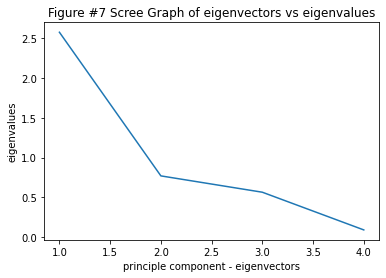

In [72]:
pca.n_components = 10
pc_vals = np.arange(pca.n_components_) + 1
plt.plot(pc_vals, pca.explained_variance_)
plt.xlabel("principle component - eigenvectors")
plt.ylabel("eigenvalues")
plt.title("Figure #7 Scree Graph of eigenvectors vs eigenvalues")

Text(0.5, 1.0, 'Figure #8 - proportion of variance explained')

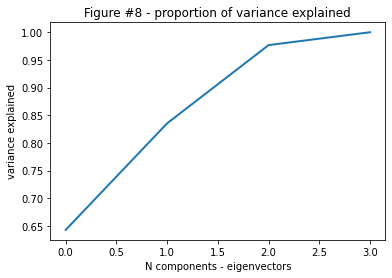

In [76]:
pca.n_components = 4
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cumulative_var_explained = np.cumsum(percentage_var_explained)

plt.plot(cumulative_var_explained, linewidth=2)
plt.xlabel("N components - eigenvectors")
plt.ylabel("variance explained")
#plt.xticks(np.arange(0, 3, 0.5))
plt.title("Figure #8 - proportion of variance explained")

In [189]:
from sklearn.model_selection import train_test_split

X2=Comp_df[feature_cols]
y2=Comp_df['Class_encoded2']

X_train,X_test,Y_train,Y_test=train_test_split(X2,y2,test_size=0.7,random_state=1)

#data shapes - check split data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(999, 4)
(2333, 4)
(999,)
(2333,)


In [123]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x_train = sc.fit_transform(X_train)
scaled_x_test = sc.transform(X_test)

In [124]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=2)

In [125]:
#kNN model classifier 
knn.fit(X_train,Y_train)
kNNmodel=knn.predict(X_test)

In [167]:
#output report of findings 
report1=pd.DataFrame()
report1['Actual values']=Y_test
report1['Predicted values KNN']= kNNmodel

print(report1)

      Actual values  Predicted values KNN
3020              1                     1
600               0                     1
1012              0                     0
1156              2                     2
517               0                     0
...             ...                   ...
1743              2                     2
819               0                     0
2447              1                     2
1116              0                     1
1709              2                     2

[2333 rows x 2 columns]


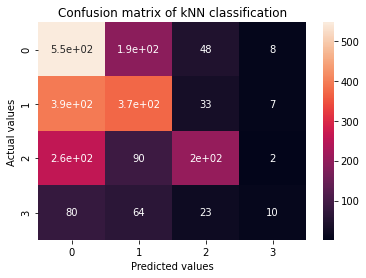

In [168]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(Y_test,kNNmodel)

ax = sns.heatmap(confusion_mat, annot=True)
ax.set_title('Confusion matrix of kNN classification')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
plt.show()

In [128]:
print('\n accuracy kNN: ', knn.score(X_test, Y_test))


 accuracy kNN:  0.4856408058294042


In [192]:
#Preprocess
print(pca_final.head())
pca_final.isnull().any()
pca_final = pca_final.dropna(axis = 0, how ='any')
pca_final.isnull().sum()
le = LabelEncoder()
pca_final['classification_encoded']= le.fit_transform(pca_final['category'])


         PC1       PC2       PC3       PC4 category  classification_encoded
0  11.957598  6.859166 -0.902344 -1.594504  Desktop                       0
1   9.940040  6.773034 -0.140610 -0.053071  Desktop                       0
2   9.773173  6.735870 -0.042522  0.097793  Desktop                       0
3   8.096232  2.850636 -1.109320 -2.353826  Desktop                       0
4   6.832753  1.681407 -1.041044 -2.144635  Desktop                       0


In [193]:
features=['PC1', 'PC2']
xp=pca_final[features] # since these are the features we take them as x
yp=pca_final['classification_encoded'] # since species is the output or label we'll take it as y
x_trainp, x_testp, y_trainp, y_testp = train_test_split(xp, yp, test_size = 0.7,random_state=1)

In [194]:
#KNN model with PCA
modelPCA = KNeighborsClassifier(n_neighbors=2)
modelPCA.fit(x_trainp, y_trainp)
y_predictionp= modelPCA.predict(x_testp)

In [195]:
print('\n accuracy kNN after PCA: ', modelPCA.score(x_testp, y_testp))


 accuracy kNN after PCA:  0.4624946420917274


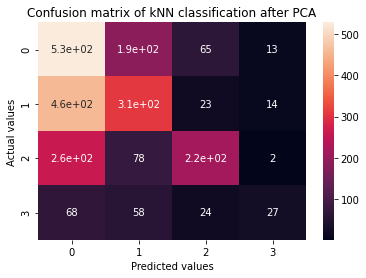

In [196]:
confusion_mat_pca = confusion_matrix(y_testp, y_predictionp)
ax4 = sns.heatmap(confusion_mat_pca, annot=True)
ax4.set_title('Confusion matrix of kNN classification after PCA')
ax4.set_xlabel('Predicted values')
ax4.set_ylabel('Actual values')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

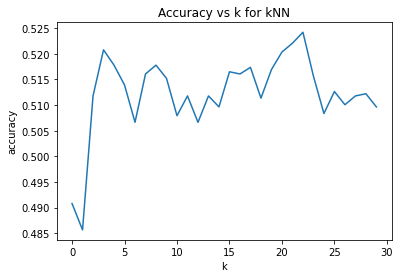

In [197]:
accs = []
k = list(range(30))
for n in range(30):
    m=KNeighborsClassifier(n_neighbors=n+1)
    m.fit(X_train, Y_train)
    accs.append(m.score(X_test, Y_test))
plt.plot(k, accs)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("Accuracy vs k for kNN")
plt.show

In [199]:
#train model with cv of 5 
cv_scores = cross_val_score(knn, X_train,Y_train, cv=5)#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.485      0.485      0.495      0.47       0.46231156]
cv_scores mean:0.4794623115577889


In [201]:
from sklearn.model_selection import GridSearchCV
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, Y_train)
#check top performing nvalue
print("Best neigbours: ",knn_cv.best_params_)
print("best score of neigbour: ",knn_cv.best_score_)

Best neigbours:  {'n_neighbors': 11}
best score of neigbour:  0.5314723618090451


<function matplotlib.pyplot.show(close=None, block=None)>

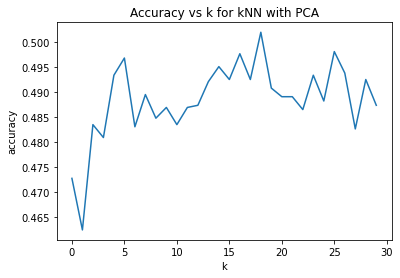

In [205]:
accs = []
k = list(range(30))
for n in range(30):
    m=KNeighborsClassifier(n_neighbors=n+1)
    m.fit(x_trainp, y_trainp)
    accs.append(m.score(x_testp, y_testp))
plt.plot(k, accs)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("Accuracy vs k for kNN with PCA")
plt.show

In [203]:
#train model with cv of 5 
cv_scores = cross_val_score(modelPCA, x_trainp,y_trainp, cv=5)#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.455     0.47      0.465     0.49      0.4321608]
cv_scores mean:0.46243216080402016


In [204]:
from sklearn.model_selection import GridSearchCV
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_cv = GridSearchCV(modelPCA, param_grid, cv=5)
knn_cv.fit(x_trainp,y_trainp)
#check top performing nvalue
print("Best neigbours: ",knn_cv.best_params_)
print("best score of neigbour: ",knn_cv.best_score_)

Best neigbours:  {'n_neighbors': 10}
best score of neigbour:  0.49248743718592963


In [178]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(n_estimators=20, learning_rate=0.25)
model_ada = ada_boost.fit(X_train, Y_train)

y_pred_ada = model_ada.predict(X_test)


#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
r_forest =RandomForestClassifier(n_estimators=20)
r_fit = r_forest.fit(X_train,Y_train)

y_pred_rf =r_fit.predict(X_test)


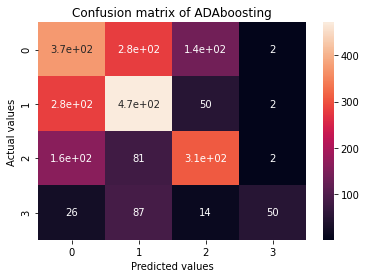

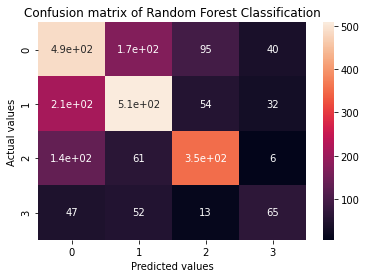

In [179]:
confusion_mat_ADAboost = confusion_matrix(Y_test, y_pred_ada)


confusion_mat_rf = confusion_matrix(Y_test,y_pred_rf)

ax4 = sns.heatmap(confusion_mat_ADAboost, annot=True)
ax4.set_title('Confusion matrix of ADAboosting')
ax4.set_xlabel('Predicted values')
ax4.set_ylabel('Actual values')
plt.show()

ax2 = sns.heatmap(confusion_mat_rf , annot=True)
ax2.set_title('Confusion matrix of Random Forest Classification')
ax2.set_xlabel('Predicted values')
ax2.set_ylabel('Actual values')
plt.show()

In [180]:
from sklearn import metrics

print('accuracy ADAboosting: ', metrics.accuracy_score(Y_test, y_pred_ada))
print('accuracy Random Forest: ', metrics.accuracy_score(Y_test, y_pred_rf ))

accuracy ADAboosting:  0.5152164594942135
accuracy Random Forest:  0.6060865837976854


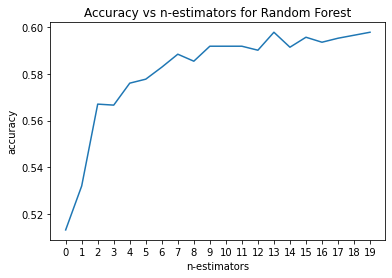

In [181]:
from numpy import *

accs_rf = []
k = list(range(20))
for n in range(20):
    r_forest = RandomForestClassifier(n_estimators=n+1, random_state = random.seed(1234))
    r_forest.fit(X_train, Y_train)
    accs_rf.append(r_forest.score(X_test, Y_test))
plt.plot(k, accs_rf)
plt.xlabel("n-estimators")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 20, 1))
plt.title("Accuracy vs n-estimators for Random Forest")
plt.show()

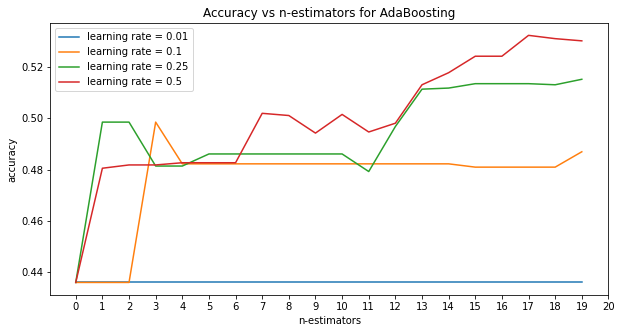

In [174]:
ada_list1 =[]
ada_list2= []
ada_list3= []
ada_list4= []
k = list(range(20))
for n in range(20):
    
    ada_boost1 = AdaBoostClassifier(n_estimators=n+1, learning_rate=0.01)
    ada_boost2 = AdaBoostClassifier(n_estimators=n+1, learning_rate=0.1)
    ada_boost3 = AdaBoostClassifier(n_estimators=n+1, learning_rate=0.25)
    ada_boost4 = AdaBoostClassifier(n_estimators=n+1, learning_rate=0.5)
    ada_boost1.fit(X_train, Y_train)
    ada_boost2.fit(X_train, Y_train)
    ada_boost3.fit(X_train, Y_train)
    ada_boost4.fit(X_train, Y_train)
    ada_list1.append(ada_boost1.score(X_test, Y_test))
    ada_list2.append(ada_boost2.score(X_test, Y_test))
    ada_list3.append(ada_boost3.score(X_test, Y_test))
    ada_list4.append(ada_boost4.score(X_test, Y_test))

plt.figure(figsize=(10,5))
plt.plot(k, ada_list1, label = "learning rate = 0.01")
plt.plot(k, ada_list2, label = "learning rate = 0.1")
plt.plot(k, ada_list3, label = "learning rate = 0.25")
plt.plot(k, ada_list4, label = "learning rate = 0.5")
plt.xlabel("n-estimators")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 21, 1))
plt.title("Accuracy vs n-estimators for AdaBoosting")
plt.legend()
plt.show()

In [177]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'learning_rate': [0.01, 0.1, 0.25, 0.5]
}
clf = GridSearchCV(model_ada, parameters, cv=10)
clf.fit(X_train, Y_train) 
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))

Best: 0.518545 using {'learning_rate': 0.5, 'n_estimators': 20}
